# 2. 탐색적 데이터 분석 (EDA)

## 목표
- 타격 일관성(CV) 분포 시각화
- 장타형 vs 안타형 타자의 성적 분포 비교
- 포지션별, 경력별 일관성 차이 탐색

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm
from pathlib import Path
import seaborn as sns
from scipy import stats
from scipy.stats import shapiro, mannwhitneyu, kruskal, ranksums
import warnings
warnings.filterwarnings('ignore')

nanum_candidates = [
    '/Users/hoyana/Library/Fonts/NanumGothic-Regular.ttf',
    '/Users/hoyana/Library/Fonts/NanumGothic-Bold.ttf',
    '/Users/hoyana/Library/Fonts/NanumGothic-ExtraBold.ttf',
    '/Library/Fonts/NanumGothic-Regular.ttf',
    '/Library/Fonts/NanumGothic-Bold.ttf',
    '/Library/Fonts/NanumGothic-ExtraBold.ttf',
]
for path in nanum_candidates:
    if Path(path).exists():
        fm.fontManager.addfont(path)

plt.rcParams['font.family'] = ['NanumGothic', 'AppleGothic', 'DejaVu Sans']
plt.rcParams['axes.unicode_minus'] = False

## 2.1 데이터 로드

In [2]:
data_path = '../outputs/'
df = pd.read_csv(data_path + 'preprocessed_data.csv')

print(f"데이터 Shape: {df.shape}")
df.head()

데이터 Shape: (903, 42)


,batter_id,batter_name,year,team,avg,G,AB,R,H,2B,...,birth_year,age,position_group,career_years,career_group,HR_per_AB,batter_type,CV,std_daily_avg,games_count
0,0,가르시아,2018,LG,0.339,50,183,27,62,9,...,1985.0,34.0,내야수,1,5년차 이하,0.043716,장타형,0.892193,0.280743,50
1,1,강경학,2015,한화,0.257,120,311,50,80,7,...,1992.0,24.0,내야수,8,6년차 이상,0.006431,안타형,1.175115,0.272672,103
2,1,강경학,2016,한화,0.158,46,101,16,16,3,...,1992.0,25.0,내야수,8,6년차 이상,0.009901,안타형,1.426298,0.194028,37
3,1,강경학,2018,한화,0.278,77,245,42,68,11,...,1992.0,27.0,내야수,8,6년차 이상,0.020408,안타형,1.056978,0.271967,73
4,4,강민호,2005,롯데,0.243,104,214,20,52,11,...,1985.0,21.0,포수,15,6년차 이상,0.009346,안타형,1.378389,0.288523,93


## 2.2 일관성 지표(CV) 분포

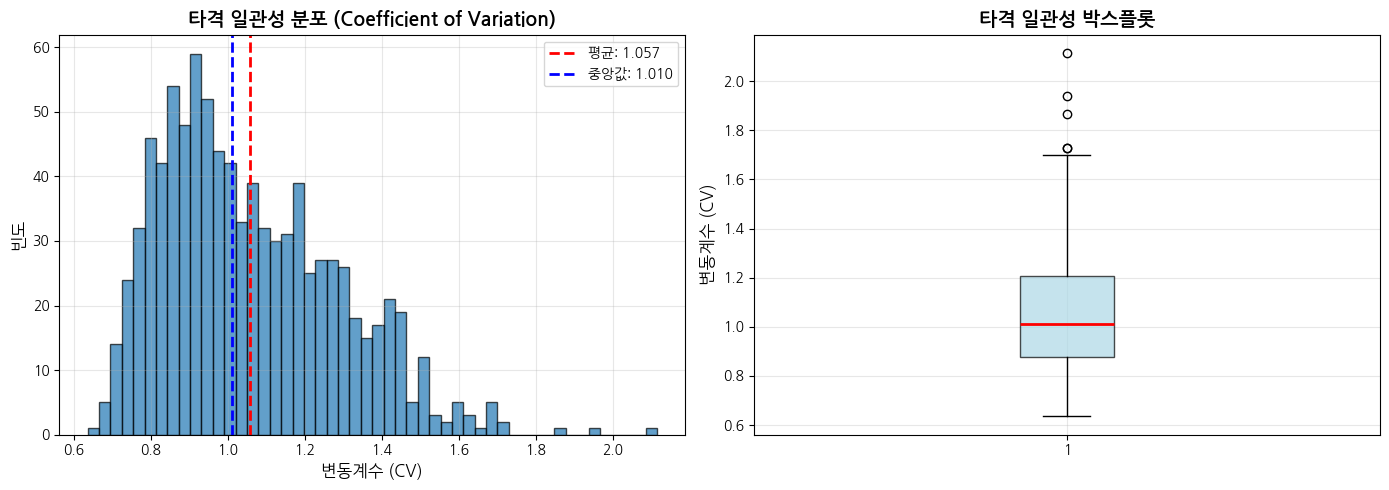


CV 평균: 1.0568
CV 중앙값: 1.0096
CV 표준편차: 0.2287


In [3]:
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

axes[0].hist(df['CV'], bins=50, edgecolor='black', alpha=0.7)
axes[0].axvline(df['CV'].mean(), color='red', linestyle='--', linewidth=2, label=f'평균: {df["CV"].mean():.3f}')
axes[0].axvline(df['CV'].median(), color='blue', linestyle='--', linewidth=2, label=f'중앙값: {df["CV"].median():.3f}')
axes[0].set_xlabel('변동계수 (CV)', fontsize=12)
axes[0].set_ylabel('빈도', fontsize=12)
axes[0].set_title('타격 일관성 분포 (Coefficient of Variation)', fontsize=14, fontweight='bold')
axes[0].legend()
axes[0].grid(True, alpha=0.3)

axes[1].boxplot(df['CV'], vert=True, patch_artist=True,
                boxprops=dict(facecolor='lightblue', alpha=0.7),
                medianprops=dict(color='red', linewidth=2))
axes[1].set_ylabel('변동계수 (CV)', fontsize=12)
axes[1].set_title('타격 일관성 박스플롯', fontsize=14, fontweight='bold')
axes[1].grid(True, alpha=0.3)

plt.tight_layout()
plt.savefig(data_path + 'cv_distribution.png', dpi=300, bbox_inches='tight')
plt.show()

print(f"\nCV 평균: {df['CV'].mean():.4f}")
print(f"CV 중앙값: {df['CV'].median():.4f}")
print(f"CV 표준편차: {df['CV'].std():.4f}")

## 2.3 장타형 vs 안타형 타자 비교

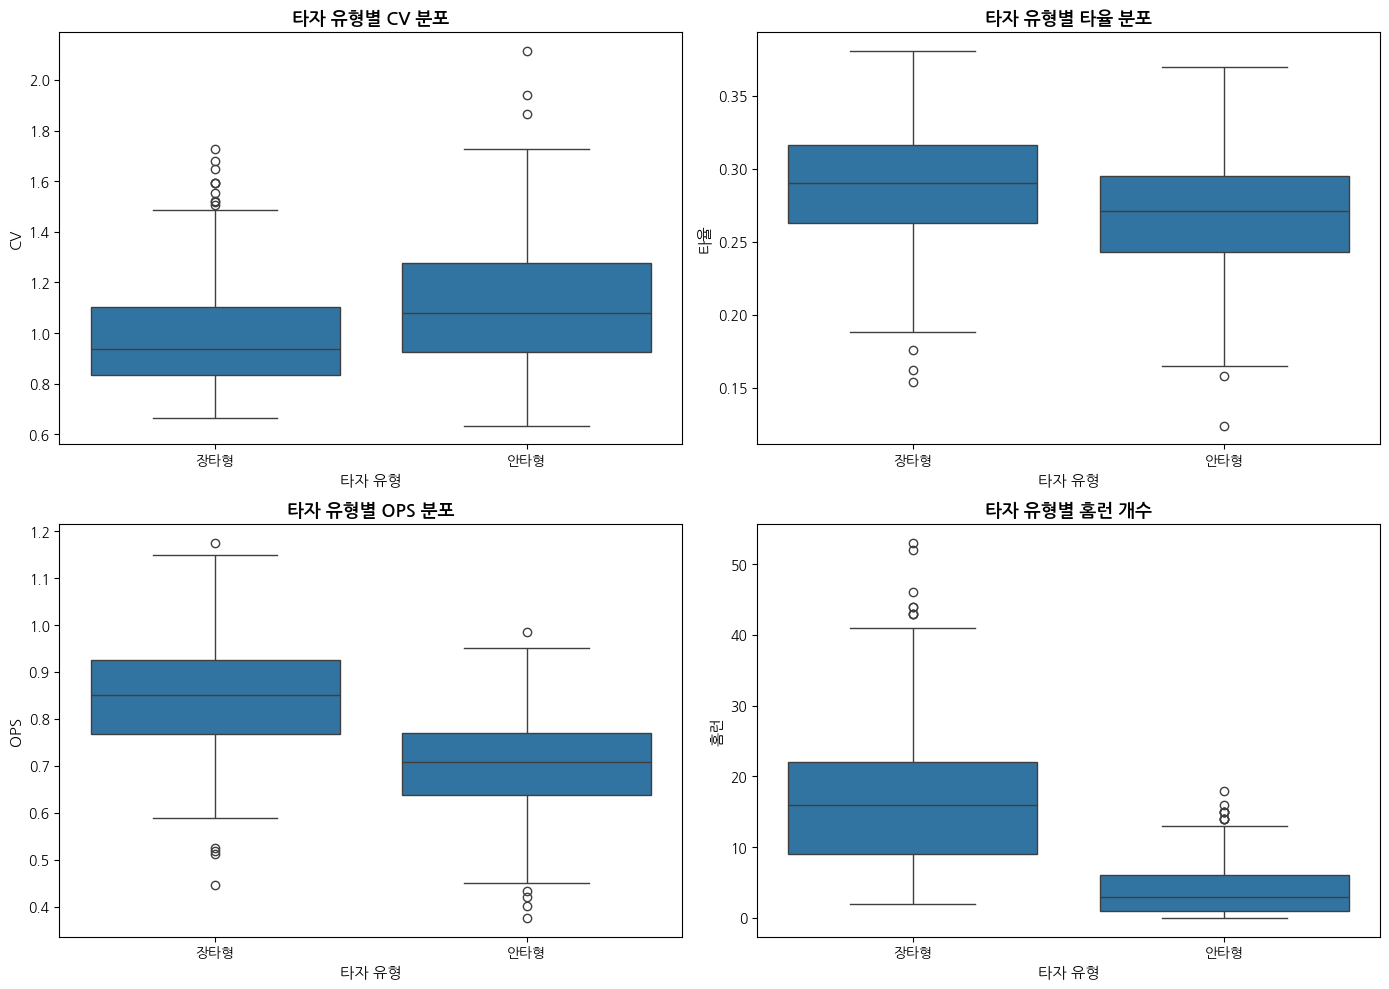

In [4]:
fig, axes = plt.subplots(2, 2, figsize=(14, 10))

sns.boxplot(data=df, x='batter_type', y='CV', ax=axes[0, 0])
axes[0, 0].set_title('타자 유형별 CV 분포', fontsize=13, fontweight='bold')
axes[0, 0].set_xlabel('타자 유형', fontsize=11)
axes[0, 0].set_ylabel('CV', fontsize=11)

sns.boxplot(data=df, x='batter_type', y='avg', ax=axes[0, 1])
axes[0, 1].set_title('타자 유형별 타율 분포', fontsize=13, fontweight='bold')
axes[0, 1].set_xlabel('타자 유형', fontsize=11)
axes[0, 1].set_ylabel('타율', fontsize=11)

sns.boxplot(data=df, x='batter_type', y='OPS', ax=axes[1, 0])
axes[1, 0].set_title('타자 유형별 OPS 분포', fontsize=13, fontweight='bold')
axes[1, 0].set_xlabel('타자 유형', fontsize=11)
axes[1, 0].set_ylabel('OPS', fontsize=11)

sns.boxplot(data=df, x='batter_type', y='HR', ax=axes[1, 1])
axes[1, 1].set_title('타자 유형별 홈런 개수', fontsize=13, fontweight='bold')
axes[1, 1].set_xlabel('타자 유형', fontsize=11)
axes[1, 1].set_ylabel('홈런', fontsize=11)

plt.tight_layout()
plt.savefig(data_path + 'batter_type_comparison.png', dpi=300, bbox_inches='tight')
plt.show()

In [5]:
print("\n=== 타자 유형별 통계 ===")
print(df.groupby('batter_type')[['CV', 'avg', 'OPS', 'HR']].describe())


=== 타자 유형별 통계 ===
                CV                                                    \
             count      mean       std       min       25%       50%   
batter_type                                                            
안타형          514.0  1.109795  0.233389  0.635004  0.924306  1.080940   
장타형          389.0  0.986725  0.202230  0.665845  0.836152  0.939176   

                                   avg            ...    OPS            HR  \
                  75%       max  count      mean  ...    75%    max  count   
batter_type                                       ...                        
안타형          1.276105  2.115343  514.0  0.269148  ...  0.769  0.985  514.0   
장타형          1.101706  1.728254  389.0  0.287895  ...  0.925  1.175  389.0   

                                                              
                  mean       std  min  25%   50%   75%   max  
batter_type                                                   
안타형           4.038911  3.614251  0.0  1

## 2.4 포지션별 일관성 비교

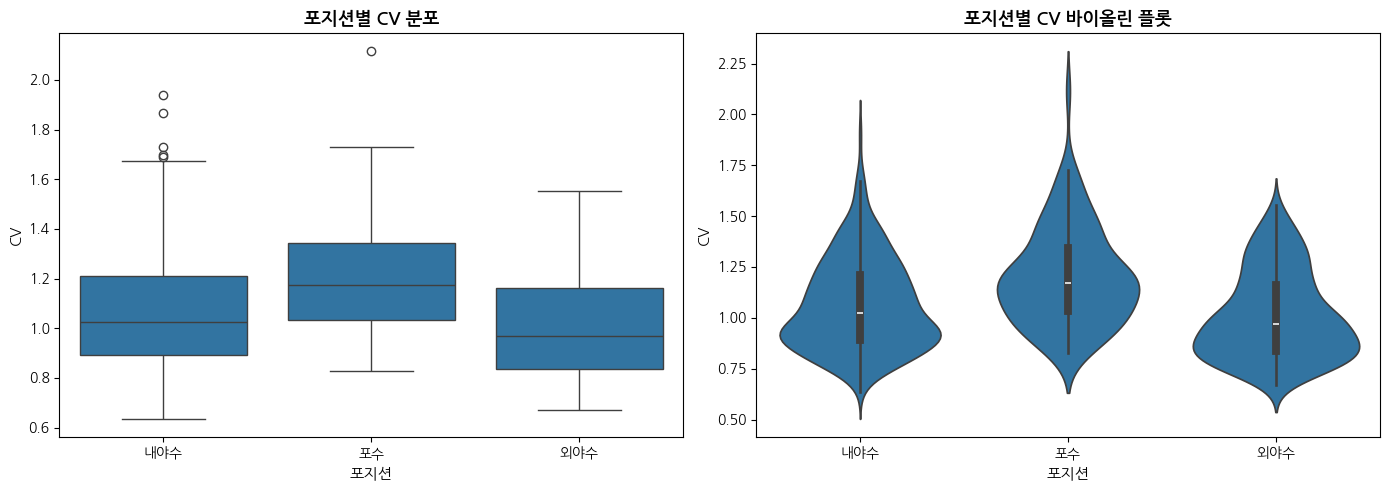

In [6]:
position_data = df[df['position_group'].isin(['내야수', '외야수', '포수'])]

fig, axes = plt.subplots(1, 2, figsize=(14, 5))

sns.boxplot(data=position_data, x='position_group', y='CV', ax=axes[0])
axes[0].set_title('포지션별 CV 분포', fontsize=13, fontweight='bold')
axes[0].set_xlabel('포지션', fontsize=11)
axes[0].set_ylabel('CV', fontsize=11)

sns.violinplot(data=position_data, x='position_group', y='CV', ax=axes[1])
axes[1].set_title('포지션별 CV 바이올린 플롯', fontsize=13, fontweight='bold')
axes[1].set_xlabel('포지션', fontsize=11)
axes[1].set_ylabel('CV', fontsize=11)

plt.tight_layout()
plt.savefig(data_path + 'position_cv_comparison.png', dpi=300, bbox_inches='tight')
plt.show()

In [7]:
print("\n=== 포지션별 CV 통계 ===")
print(position_data.groupby('position_group')['CV'].describe())


=== 포지션별 CV 통계 ===
                count      mean       std       min       25%       50%  \
position_group                                                            
내야수             467.0  1.064807  0.225028  0.635004  0.892081  1.025889   
외야수             346.0  1.008578  0.213756  0.669442  0.837247  0.967296   
포수               90.0  1.200418  0.239697  0.826354  1.033523  1.173029   

                     75%       max  
position_group                      
내야수             1.210318  1.938848  
외야수             1.160632  1.552492  
포수              1.342744  2.115343  


## 2.5 경력별 일관성 비교

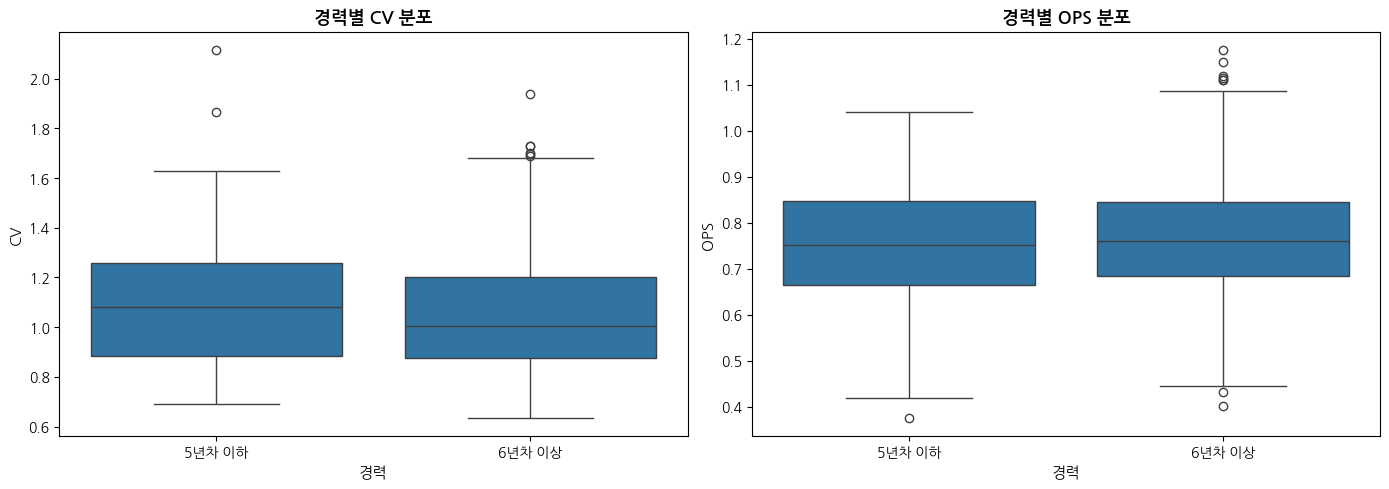

In [8]:
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

sns.boxplot(data=df, x='career_group', y='CV', ax=axes[0])
axes[0].set_title('경력별 CV 분포', fontsize=13, fontweight='bold')
axes[0].set_xlabel('경력', fontsize=11)
axes[0].set_ylabel('CV', fontsize=11)

sns.boxplot(data=df, x='career_group', y='OPS', ax=axes[1])
axes[1].set_title('경력별 OPS 분포', fontsize=13, fontweight='bold')
axes[1].set_xlabel('경력', fontsize=11)
axes[1].set_ylabel('OPS', fontsize=11)

plt.tight_layout()
plt.savefig(data_path + 'career_comparison.png', dpi=300, bbox_inches='tight')
plt.show()

In [9]:
print("\n=== 경력별 통계 ===")
print(df.groupby('career_group')[['CV', 'avg', 'OPS']].describe())


=== 경력별 통계 ===
                 CV                                                    \
              count      mean       std       min       25%       50%   
career_group                                                            
5년차 이하         95.0  1.102438  0.265138  0.690639  0.883327  1.080485   
6년차 이상        808.0  1.051409  0.223567  0.635004  0.877880  1.003576   

                                    avg            ...                   OPS  \
                   75%       max  count      mean  ...     75%    max  count   
career_group                                       ...                         
5년차 이하        1.259218  2.115343   95.0  0.274663  ...  0.3075  0.355   95.0   
6년차 이상        1.200928  1.938848  808.0  0.277525  ...  0.3040  0.381  808.0   

                                                                      
                  mean       std    min    25%    50%     75%    max  
career_group                                                          
5년차 

## 2.6 CV와 주요 성적 지표의 관계

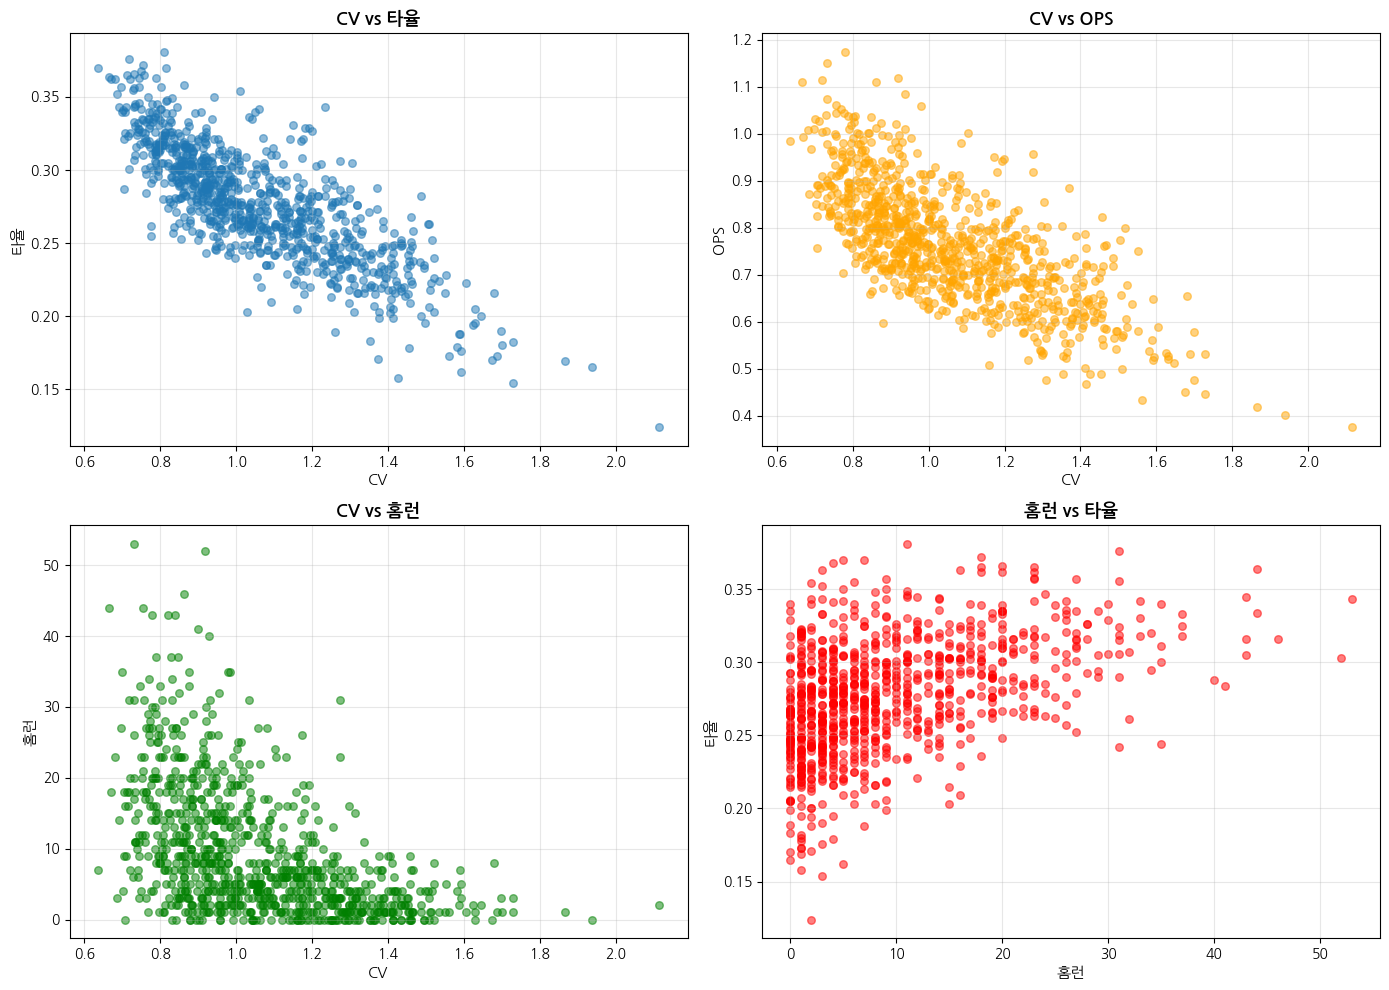

In [10]:
fig, axes = plt.subplots(2, 2, figsize=(14, 10))

axes[0, 0].scatter(df['CV'], df['avg'], alpha=0.5, s=30)
axes[0, 0].set_xlabel('CV', fontsize=11)
axes[0, 0].set_ylabel('타율', fontsize=11)
axes[0, 0].set_title('CV vs 타율', fontsize=13, fontweight='bold')
axes[0, 0].grid(True, alpha=0.3)

axes[0, 1].scatter(df['CV'], df['OPS'], alpha=0.5, s=30, color='orange')
axes[0, 1].set_xlabel('CV', fontsize=11)
axes[0, 1].set_ylabel('OPS', fontsize=11)
axes[0, 1].set_title('CV vs OPS', fontsize=13, fontweight='bold')
axes[0, 1].grid(True, alpha=0.3)

axes[1, 0].scatter(df['CV'], df['HR'], alpha=0.5, s=30, color='green')
axes[1, 0].set_xlabel('CV', fontsize=11)
axes[1, 0].set_ylabel('홈런', fontsize=11)
axes[1, 0].set_title('CV vs 홈런', fontsize=13, fontweight='bold')
axes[1, 0].grid(True, alpha=0.3)

axes[1, 1].scatter(df['HR'], df['avg'], alpha=0.5, s=30, color='red')
axes[1, 1].set_xlabel('홈런', fontsize=11)
axes[1, 1].set_ylabel('타율', fontsize=11)
axes[1, 1].set_title('홈런 vs 타율', fontsize=13, fontweight='bold')
axes[1, 1].grid(True, alpha=0.3)

plt.tight_layout()
plt.savefig(data_path + 'cv_relationships.png', dpi=300, bbox_inches='tight')
plt.show()

## 2.7 상관관계 분석

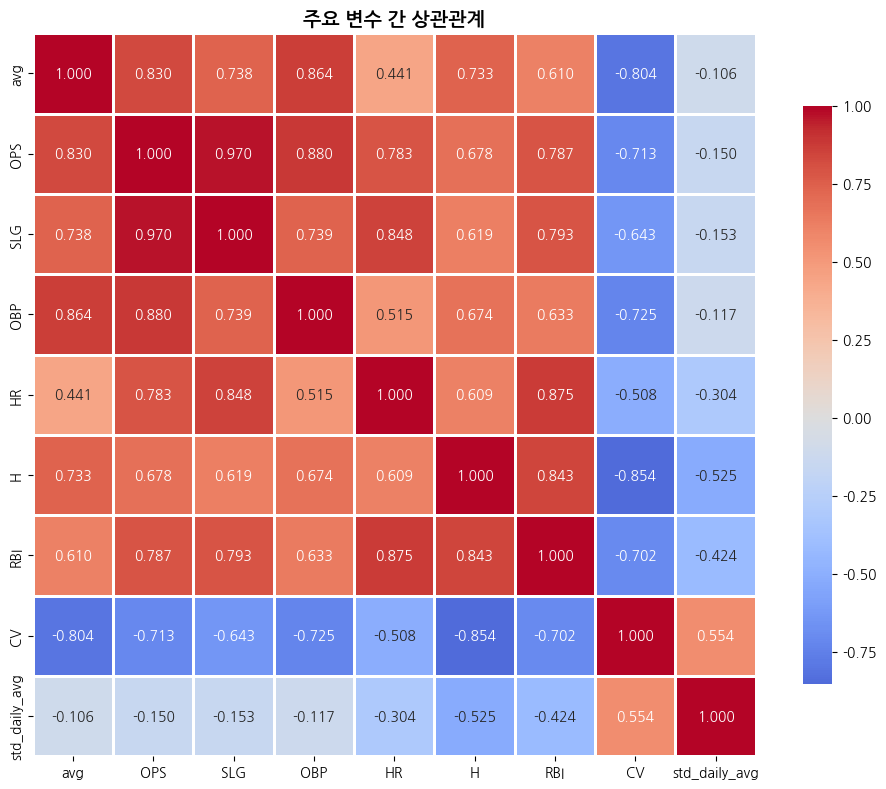


=== CV와 다른 변수의 상관계수 ===
CV               1.000000
std_daily_avg    0.553599
HR              -0.508275
SLG             -0.642890
RBI             -0.702410
OPS             -0.713347
OBP             -0.724807
avg             -0.804381
H               -0.853994
Name: CV, dtype: float64


In [11]:
corr_vars = ['avg', 'OPS', 'SLG', 'OBP', 'HR', 'H', 'RBI', 'CV', 'std_daily_avg']
corr_matrix = df[corr_vars].corr()

plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, fmt='.3f', cmap='coolwarm', center=0,
            square=True, linewidths=1, cbar_kws={"shrink": 0.8})
plt.title('주요 변수 간 상관관계', fontsize=14, fontweight='bold')
plt.tight_layout()
plt.savefig(data_path + 'correlation_matrix.png', dpi=300, bbox_inches='tight')
plt.show()

print("\n=== CV와 다른 변수의 상관계수 ===")
print(corr_matrix['CV'].sort_values(ascending=False))

## 2.8 연도별 트렌드

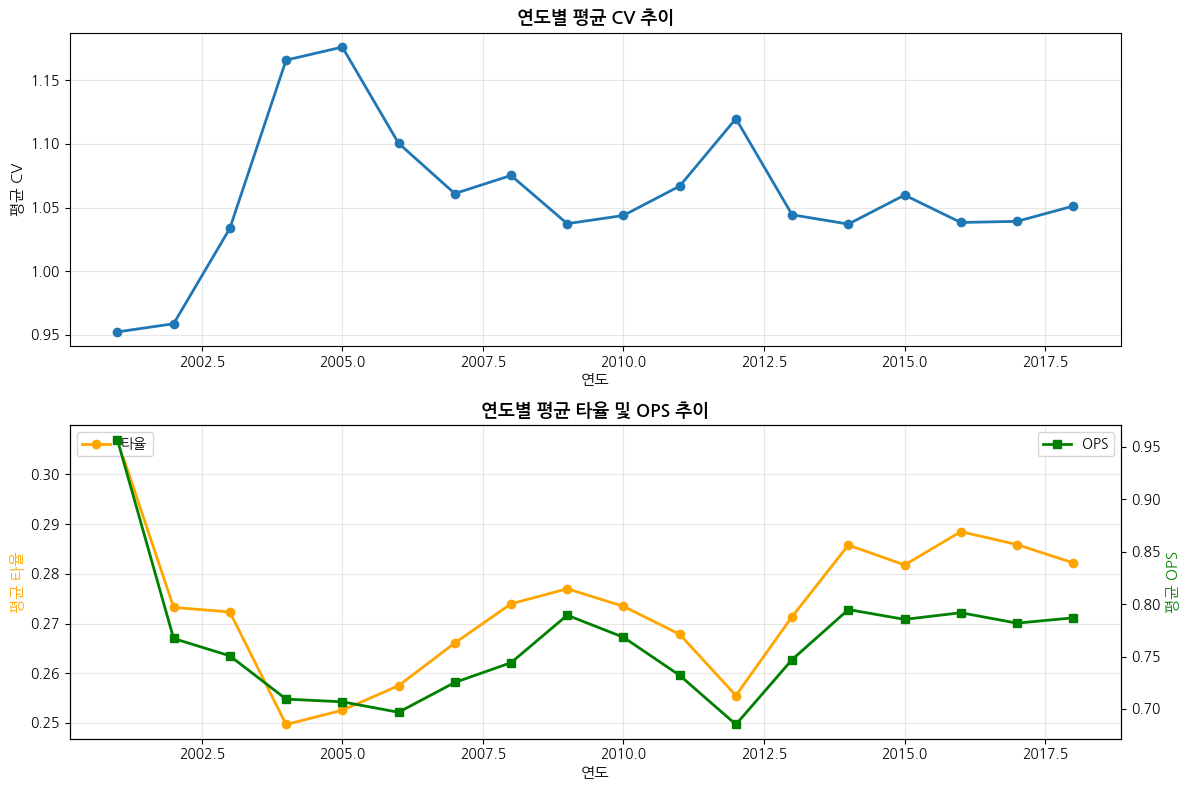

In [12]:
yearly_stats = df.groupby('year').agg({
    'CV': 'mean',
    'avg': 'mean',
    'OPS': 'mean',
    'batter_id': 'count'
}).reset_index()
yearly_stats.columns = ['year', 'avg_CV', 'avg_batting', 'avg_OPS', 'count']

fig, axes = plt.subplots(2, 1, figsize=(12, 8))

axes[0].plot(yearly_stats['year'], yearly_stats['avg_CV'], marker='o', linewidth=2, markersize=6)
axes[0].set_xlabel('연도', fontsize=11)
axes[0].set_ylabel('평균 CV', fontsize=11)
axes[0].set_title('연도별 평균 CV 추이', fontsize=13, fontweight='bold')
axes[0].grid(True, alpha=0.3)

axes[1].plot(yearly_stats['year'], yearly_stats['avg_batting'], marker='o', linewidth=2, markersize=6, label='타율', color='orange')
ax2 = axes[1].twinx()
ax2.plot(yearly_stats['year'], yearly_stats['avg_OPS'], marker='s', linewidth=2, markersize=6, label='OPS', color='green')
axes[1].set_xlabel('연도', fontsize=11)
axes[1].set_ylabel('평균 타율', fontsize=11, color='orange')
ax2.set_ylabel('평균 OPS', fontsize=11, color='green')
axes[1].set_title('연도별 평균 타율 및 OPS 추이', fontsize=13, fontweight='bold')
axes[1].grid(True, alpha=0.3)
axes[1].legend(loc='upper left')
ax2.legend(loc='upper right')

plt.tight_layout()
plt.savefig(data_path + 'yearly_trends.png', dpi=300, bbox_inches='tight')
plt.show()

## 2.9 일관성 수준별 선수 분류


=== 일관성 수준별 분포 ===
consistency_level
안정        226
매우 불안정    226
매우 안정     226
불안정       225
Name: count, dtype: int64


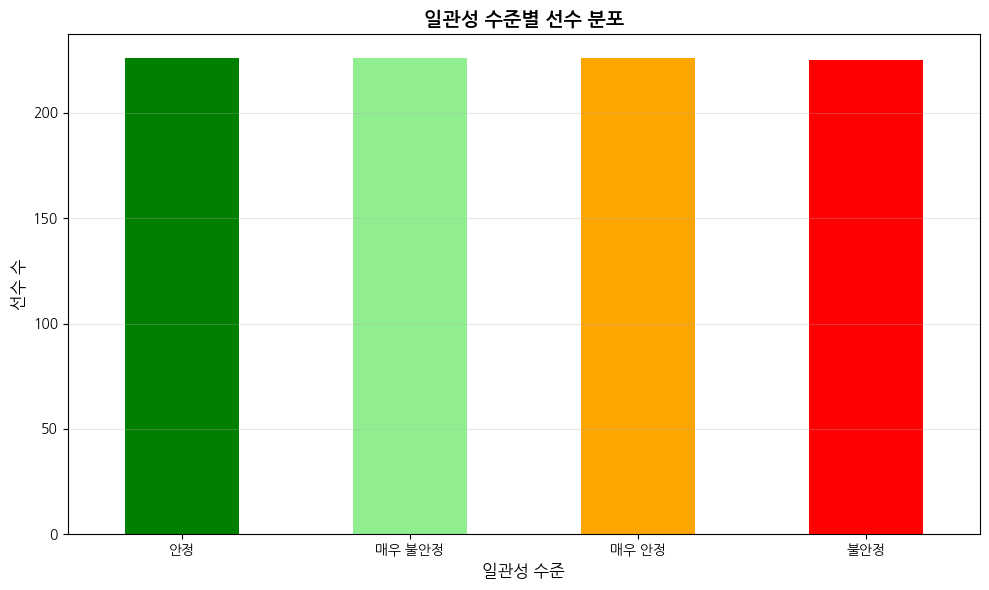

In [13]:
cv_quartiles = df['CV'].quantile([0.25, 0.5, 0.75])

def classify_consistency(cv):
    if cv <= cv_quartiles[0.25]:
        return '매우 안정'
    elif cv <= cv_quartiles[0.5]:
        return '안정'
    elif cv <= cv_quartiles[0.75]:
        return '불안정'
    else:
        return '매우 불안정'

df['consistency_level'] = df['CV'].apply(classify_consistency)

print("\n=== 일관성 수준별 분포 ===")
print(df['consistency_level'].value_counts())

plt.figure(figsize=(10, 6))
df['consistency_level'].value_counts().plot(kind='bar', color=['green', 'lightgreen', 'orange', 'red'])
plt.title('일관성 수준별 선수 분포', fontsize=14, fontweight='bold')
plt.xlabel('일관성 수준', fontsize=12)
plt.ylabel('선수 수', fontsize=12)
plt.xticks(rotation=0)
plt.grid(True, alpha=0.3, axis='y')
plt.tight_layout()
plt.savefig(data_path + 'consistency_levels.png', dpi=300, bbox_inches='tight')
plt.show()

In [14]:
print("\n=== 일관성 수준별 평균 성적 ===")
print(df.groupby('consistency_level')[['avg', 'OPS', 'HR', 'RBI']].mean())


=== 일관성 수준별 평균 성적 ===
                        avg       OPS         HR        RBI
consistency_level                                          
매우 불안정             0.235858  0.649181   3.349558  20.331858
매우 안정              0.317027  0.879991  15.938053  74.455752
불안정                0.268147  0.736689   7.280000  36.608889
안정                 0.287823  0.796566  11.384956  56.637168


## 2.10 최종 데이터 저장

In [15]:
df.to_csv(data_path + 'eda_data.csv', index=False, encoding='utf-8-sig')
print("\nEDA 완료! 데이터 저장됨: eda_data.csv")


EDA 완료! 데이터 저장됨: eda_data.csv
